## Financial Econometrics Course Work 1 - Report

In [6]:
#import the necessary libraries
from lib import *

In [16]:
#import the data as a pandas dataframe

data = pd.read_csv('cw-data.csv')
print(data.head())

#Set the date as datetime using pandas
data['date'] = pd.to_datetime(data['date'], infer_datetime_format= True)
indexed_data = data.set_index(['date'])

         date   return  GDP_growth  inflation   FFR
0  1957-04-01  7.04544     1.98098    3.53591  3.00
1  1957-07-01 -6.79407     3.07278    3.54662  3.47
2  1957-10-01 -7.28927     0.35470    3.04017  2.98
3  1958-01-01  2.94839    -2.87229    3.62527  1.20
4  1958-04-01  5.01195    -2.01954    2.84596  0.93


In [17]:
#Check if the date is set as datetime

from datetime import datetime
indexed_data.head(5)

,return,GDP_growth,inflation,FFR
date,,,,
1957-04-01,7.04544,1.98098,3.53591,3.00
1957-07-01,-6.79407,3.07278,3.54662,3.47
1957-10-01,-7.28927,0.35470,3.04017,2.98
1958-01-01,2.94839,-2.87229,3.62527,1.20
1958-04-01,5.01195,-2.01954,2.84596,0.93


## Preliminary Data Analysis    
# Descriptive Statistics and data visualization

In [18]:
#Summary statistics
print(data.describe())

                                date      return  GDP_growth   inflation  \
count                            269  269.000000  269.000000  269.000000   
mean   1990-10-01 00:37:28.327137536    1.866782    3.018618    3.705993   
min              1957-04-01 00:00:00  -30.153550   -7.502370   -1.377940   
25%              1974-01-01 00:00:00   -1.196260    1.805760    1.756230   
50%              1990-10-01 00:00:00    2.686580    3.009140    2.982460   
75%              2007-07-01 00:00:00    5.745090    4.341950    4.673650   
max              2024-04-01 00:00:00   26.286780   12.239260   14.592270   
std                              NaN    7.424930    2.432065    2.792642   

              FFR  
count  269.000000  
mean     4.718178  
min      0.070000  
25%      1.880000  
50%      4.590000  
75%      6.400000  
max     19.100000  
std      3.618868  


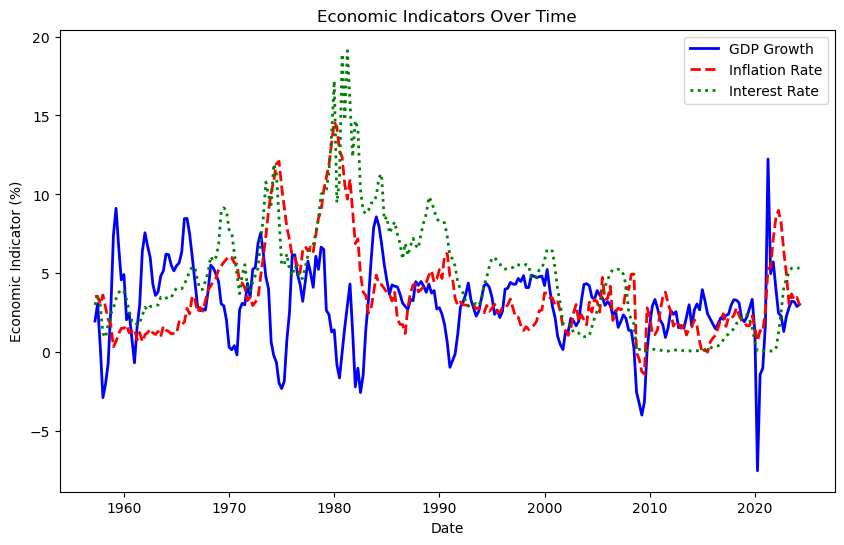

In [40]:
import matplotlib.pyplot as plt

# Create a plot with all time series

plt.figure(figsize=(10, 6))  # Set figure size for better visibility

# Plotting GDP Growth
plt.plot(indexed_data['GDP_growth'], label='GDP Growth', color='b', linestyle='-', linewidth=2)

# Plotting Inflation Rate
plt.plot(indexed_data['inflation'], label='Inflation Rate', color='r', linestyle='--', linewidth=2)

# Plotting Interest Rate
plt.plot(indexed_data['FFR'], label='Interest Rate', color='g', linestyle=':', linewidth=2)

# Adding labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Economic Indicator (%)')
plt.title('Economic Indicators Over Time')
plt.legend()  # This will display the labels for each time series

# Display the plot
plt.show()


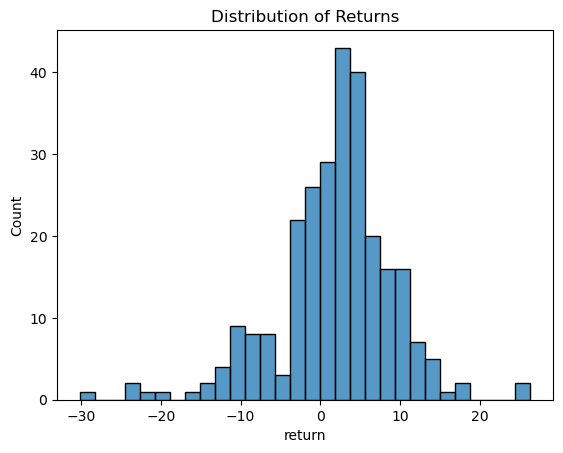

None


In [23]:
# S&P500 Returns distribution

import seaborn as sns

sns.histplot(data['return'], bins=30)
plt.title('Distribution of Returns')
print(plt.show())


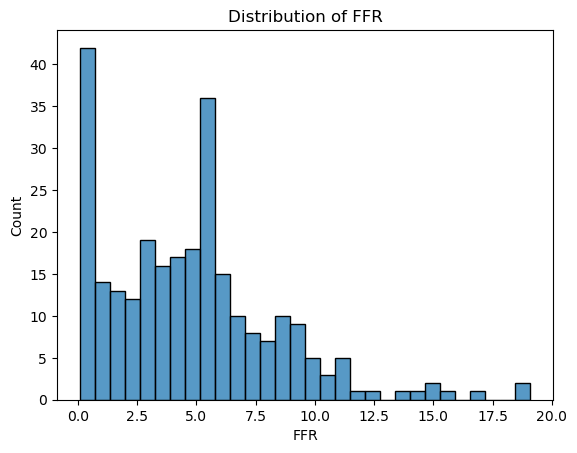

None


In [22]:
# Interest Rate distribution

sns.histplot(data['FFR'], bins=30)
plt.title('Distribution of FFR')
print(plt.show())


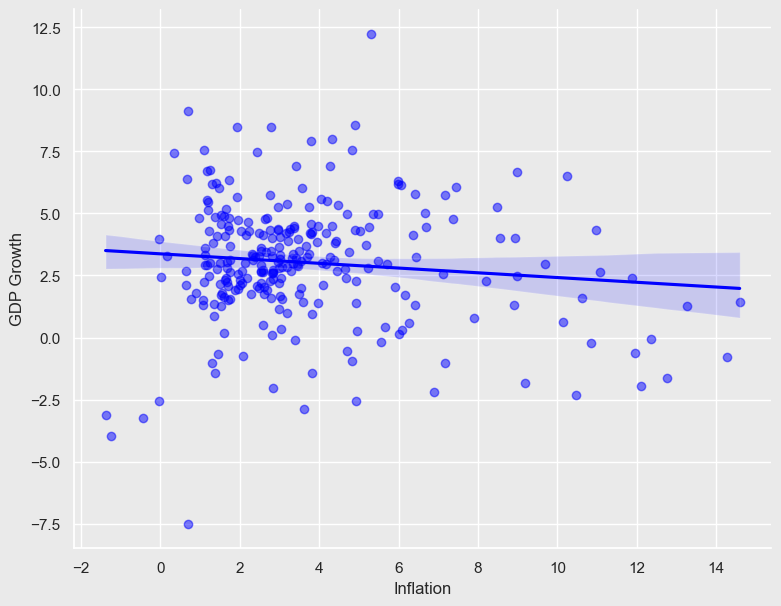

In [16]:
#Scatter plot with regression line GDP Growth vs Inflation

sns.set_theme(style='whitegrid')
sns.set(rc={'axes.facecolor':'#EAEAEA', 'figure.facecolor':'#EAEAEA'})

fig, ax = plt.subplots()
fig.set_size_inches(9, 7)
sns.regplot(x = data['inflation'], y = data['GDP_growth'], ci=95, 
            scatter_kws={"color": "blue", "alpha": .5}, 
            line_kws={"color": "blue"})

ax.set(xlabel='Inflation', ylabel='GDP Growth')
sns.despine()

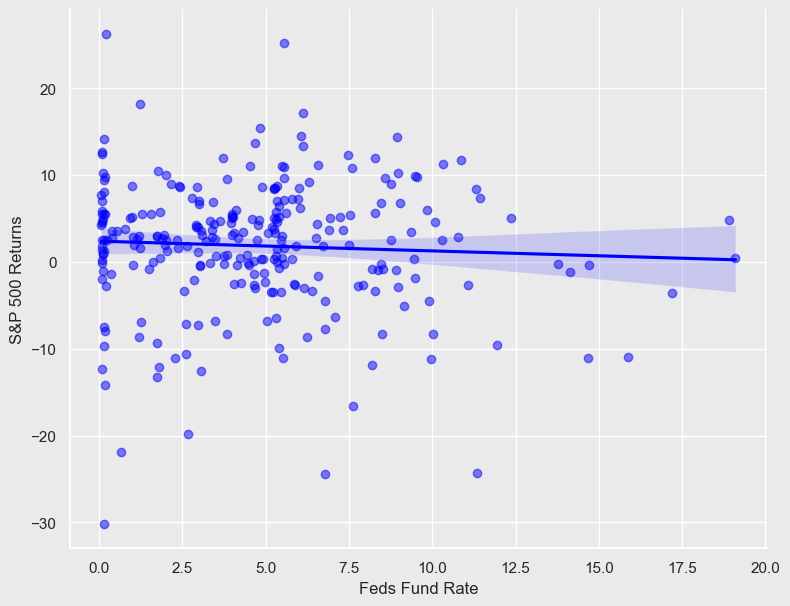

In [25]:
#Scatter plot with regression line S&P 500 vs Feds Fund Rate
sns.set_theme(style='whitegrid')
sns.set(rc={'axes.facecolor':'#EAEAEA', 'figure.facecolor':'#EAEAEA'})

fig, ax = plt.subplots()
fig.set_size_inches(9, 7)
sns.regplot(x = data['FFR'], y = data['returns'], ci=95, 
            scatter_kws={"color": "blue", "alpha": .5}, 
            line_kws={"color": "blue"})

ax.set(xlabel='Feds Fund Rate', ylabel='S&P 500 Returns')
sns.despine()

In [23]:
#Run a regression analysis 
data = data.rename(columns={'return': 'returns'})
model = smf.ols('returns ~ FFR', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8018
Date:                Tue, 29 Oct 2024   Prob (F-statistic):              0.371
Time:                        16:33:58   Log-Likelihood:                -920.09
No. Observations:                 269   AIC:                             1844.
Df Residuals:                     267   BIC:                             1851.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3965      0.745      3.217      0.0

In [28]:
#Regression with multiple independent variables
model2 = smf.ols(formula="returns ~ FFR + GDP_growth + inflation", data = data).fit()
# Print summary of regression results
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.401
Date:                Tue, 29 Oct 2024   Prob (F-statistic):              0.243
Time:                        16:35:31   Log-Likelihood:                -918.38
No. Observations:                 269   AIC:                             1845.
Df Residuals:                     265   BIC:                             1859.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4961      0.987      3.544      0.0

We constructed the following regression model:  
$$y_i = \alpha + \beta_1 X_1 +\beta_2 X_2 + \beta_3 X_1 + \epsilon_i$$

Where 
$y_i$ = GDP growth 
$X_1$ = feds fund rate 
$X_2$ = inflation 
$X_3$ = S&P 500 returns 
$\beta_{1...3}$ = the regression coefficients 


In [22]:
#Regression using GDP as dependent variable

model3 = smf.ols('GDP_growth ~ FFR + inflation + returns', data=data).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             GDP_growth   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     6.301
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           0.000383
Time:                        18:40:06   Log-Likelihood:                -611.00
No. Observations:                 269   AIC:                             1230.
Df Residuals:                     265   BIC:                             1244.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1569      0.257     12.279      0.0

From the regression output we can see that there is a statistically significant relationship between the feds fund rate, inflation and GDP growth at the 1% level (p-value < 0.001). Furthermore, we can see that between FFR and GDP growth there is a positive relationship, while between inflation and GDP growth we see a negative relationship. However, between GDP growth and the market portfolio there is no statistically significant relationship and thus the model cannot capture the complex interaction between GDP and stock market performance. 

In [23]:
#Run a regression analysis with robust covariance
print(model3.get_robustcov_results().summary())

                            OLS Regression Results                            
Dep. Variable:             GDP_growth   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     3.567
Date:                Tue, 29 Oct 2024   Prob (F-statistic):             0.0147
Time:                        18:40:10   Log-Likelihood:                -611.00
No. Observations:                 269   AIC:                             1230.
Df Residuals:                     265   BIC:                             1244.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1569      0.290     10.897      0.0

## Testing for Stationarity

In [ ]:
#Import the packages for plotting the autocrrelation and partial autocorrelation  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

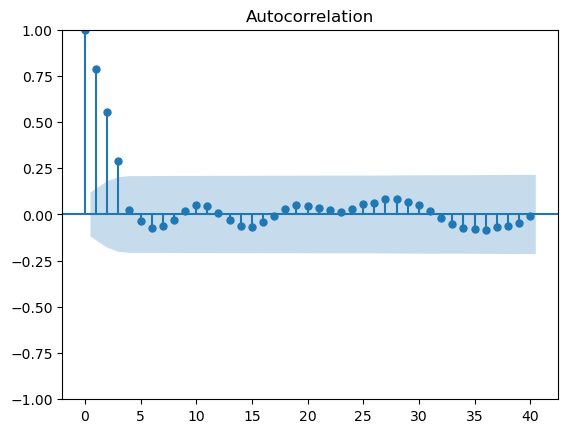

In [ ]:
#Plot the autocorrelation of the GDP growth data

plot_acf(data['GDP_growth'], lags=40)
plt.show()

#from the plot, we can see that the autocorrelation is decaying rapidly and this might be an indication that the data is stationary

In [ ]:
#Conduct the Augumented Dickey Fuller test to check for stationarity of the GDP growth data
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data['GDP_growth'], autolag='AIC', regression='ct')
print("ADF Test Results")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])



ADF Test Results
ADF-Statistic: -3.7313483762113995
P-Value: 0.020374104410931463
Number of lags: 16
Number of observations: 252
Critical Values: {'1%': -3.9951510399519887, '5%': -3.4280573478136107, '10%': -3.1373735230776614}


In [ ]:
#Conduct the Augumented Dickey Fuller test to check for stationarity of the FFR data
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data['FFR'], autolag='AIC', regression='ct')
print("ADF Test Results")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])

## Data is non stationary at level

ADF Test Results
ADF-Statistic: -2.435351969118596
P-Value: 0.36099996672428647
Number of lags: 8
Number of observations: 260
Critical Values: {'1%': -3.99401778078061, '5%': -3.427512404073737, '10%': -3.1370539508420574}


In [ ]:
#Conduct the Augumented Dickey Fuller test to check for stationarity of the Inflation data
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data['inflation'], autolag='AIC', regression='ct')
print("ADF Test Results")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])

## Data is non-stationary at level 

ADF Test Results
ADF-Statistic: -2.069751238760236
P-Value: 0.5629880928222353
Number of lags: 16
Number of observations: 252
Critical Values: {'1%': -3.9951510399519887, '5%': -3.4280573478136107, '10%': -3.1373735230776614}


In [ ]:
#Conduct the Augumented Dickey Fuller test to check for stationarity of the S&P 500 returns data
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data['return'], autolag='AIC', regression='ct')
print("ADF Test Results")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])

## Data is stationary if the p-value is less than 0.05

ADF Test Results
ADF-Statistic: -15.102387434782027
P-Value: 1.9545562692114312e-22
Number of lags: 0
Number of observations: 268
Critical Values: {'1%': -3.992952994240897, '5%': -3.4270002543156903, '10%': -3.1367535713335752}
